In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [21]:
trainset = pd.read_csv('D:\\nettech\\kagglecompetetions\\spaceship_titanic\\train.csv')
testset = pd.read_csv('D:\\nettech\\kagglecompetetions\\spaceship_titanic\\test.csv')
train_len = len(trainset)
test_len = len(testset)


In [71]:
df = pd.concat([trainset, testset], axis = 0)

In [72]:
df.shape

(12970, 14)

In [73]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Data Cleaning

In [74]:
df.isna().sum()

PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

In [81]:
print('Missing values in train set',trainset['Transported'].isna().sum())


Missing values in train set 0


##### As the test set does not have values for 'Transported' the missing values are expected

In [75]:
print('percent of missing data :', (df.isna().sum()/df.shape[0])*100)

percent of missing data : PassengerId      0.000000
HomePlanet       2.220509
CryoSleep        2.390131
Cabin            2.305320
Destination      2.112567
Age              2.081727
VIP              2.282190
RoomService      2.027756
FoodCourt        2.228219
ShoppingMall     2.359291
Spa              2.189668
VRDeck           2.066307
Name             2.266769
Transported     32.976099
dtype: float64


In [76]:
df['CryoSleep'].fillna(False, inplace=True)


In [83]:
df.isna().sum()

PassengerId        0
HomePlanet       288
CryoSleep          0
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

<AxesSubplot: xlabel='CryoSleep', ylabel='count'>

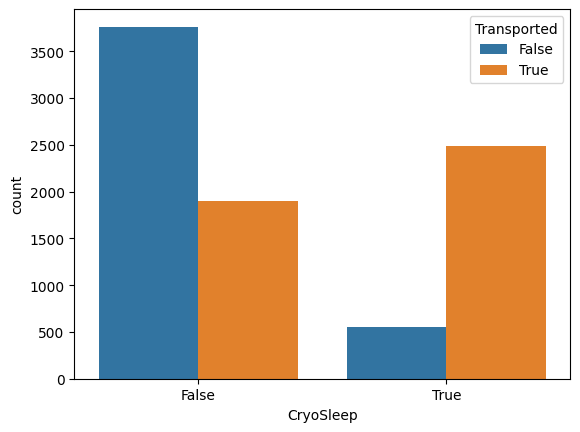

In [87]:
sns.countplot(data = df, x = 'CryoSleep', hue = 'Transported')

In [108]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [111]:
## total amount spend by the passengers can be calculated by adding all expences 
df['AmountSpent'] = df['RoomService']+df['FoodCourt']+df['ShoppingMall']+df['Spa']+df['VRDeck']

In [115]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported,AmountSpent
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,Willy Santantines,True,1091.0


In [113]:
df.drop(columns=['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'],inplace=True)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Name,Transported,AmountSpent
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,Willy Santantines,True,1091.0


In [114]:
dfcheckpoint = df.copy()

In [127]:
df = dfcheckpoint.copy()

##### Name can also be dropped as it provides no significancem

In [128]:
df.drop(columns=['Name'],inplace=True)

In [129]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Transported,AmountSpent
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,True,1091.0


##### Cabin column can be split into 3 categories - Deck, number and side

In [130]:
df['Deck']=df['Cabin'].str.split('/').str[0]
df['Number']= df['Cabin'].str.split('/').str[1]
df['Side']= df['Cabin'].str.split('/').str[2]

In [131]:
df.drop(columns=['Cabin'],inplace=True)

In [132]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,AmountSpent,Deck,Number,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,False,0.0,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,True,736.0,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,False,10383.0,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,False,5176.0,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,True,1091.0,F,1,S


In [138]:
df.isna().sum()

PassengerId       0
HomePlanet      288
CryoSleep         0
Destination     274
Age             270
VIP             296
Transported    4277
AmountSpent    1363
Deck            299
Number          299
Side            299
dtype: int64

In [139]:
df.to_csv('breaktoeat.csv')

#### Creating pipelines (learning)   ,continued the next day

In [3]:
import pandas as pd 
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [5]:
df = pd.read_csv('continue_from_this.csv')
df.head()

,Unnamed: 0,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,AmountSpent,Deck,Number,Side
0,0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,False,0.0,B,0.0,P
1,1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,True,736.0,F,0.0,S
2,2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,False,10383.0,A,0.0,S
3,3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,False,5176.0,A,0.0,S
4,4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,True,1091.0,F,1.0,S


In [6]:
df.drop(columns='Unnamed: 0', inplace=True)

In [7]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,AmountSpent,Deck,Number,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,False,0.0,B,0.0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,True,736.0,F,0.0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,False,10383.0,A,0.0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,False,5176.0,A,0.0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,True,1091.0,F,1.0,S


In [10]:
#specify numerical and categorical features
numerical_cols = df[['PassengerId', 'Age', 'AmountSpent', 'Number']]
categorical_cols = df[['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Transported', 'Deck', 'Side']]

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

#numerical pipeline
numerical_pipe = Pipeline([
    ('imputer',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])

#categorical pipeline
categorical_pipe = Pipeline([
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
])

In [17]:
#apply pipelines to data
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer([
    ('numeric', numerical_pipe, numerical_cols),
    ('categorical', categorical_pipe, categorical_cols)
])

In [18]:
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                       PassengerId   Age  AmountSpent  Number
0         0001_01  39.0          0.0     0.0
1         0002_01  24.0        736.0     0.0
2         0003_01  58.0      10383.0     0.0
3         0003_02  33.0       5176.0     0.0
4         0004_01  16.0       1091.0     1.0
...           ...   ...          ...     ...
12965     9266_02  34.0          0.0  1496.0
12966     9269_01  42.0       1018.0     NaN
12967     9271_01   NaN          0.0   296.0
12968     9273_01...
1          Earth      False    TRAPPIST-1e  False        True    F    S
2         Europa      False    TRAPPIST-1e   True       False    A    S
3         Europa      False    TRAPPIST-1e  False       False    A    S
4          Earth      False    TRAPPIST-1e  False        True    F    S
...          ...        ...            ...    ...         ...  ...  ...
12965      Earth       True    TRAPPIST-1e  False         NaN    G    S
12966      Earth      False    TRAPPIST-1e  False         NaN  NaN  NaN
12967       Mars       True    55 Cancri e  False         NaN    D    P
12968     Europa      False            NaN  False         NaN    D    P
12969      Earth       True  PSO J318.5-22  False         NaN    G    S

[12970 rows x 7 columns])])

### split the dataframe back into train and test

In [16]:
df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,AmountSpent,Deck,Number,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,False,0.0,B,0.0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,True,736.0,F,0.0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,False,10383.0,A,0.0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,False,5176.0,A,0.0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,True,1091.0,F,1.0,S
...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,TRAPPIST-1e,34.0,False,NaN,0.0,G,1496.0,S
12966,9269_01,Earth,False,TRAPPIST-1e,42.0,False,NaN,1018.0,NaN,NaN,NaN
12967,9271_01,Mars,True,55 Cancri e,NaN,False,NaN,0.0,D,296.0,P
12968,9273_01,Europa,False,NaN,NaN,False,NaN,3203.0,D,297.0,P


In [44]:
#seperating the train and test sets
test = df[df['Transported'].isnull()]
train = df[~df['Transported'].isnull()]

In [45]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,AmountSpent,Deck,Number,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,False,0.0,B,0.0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,True,736.0,F,0.0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,False,10383.0,A,0.0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,False,5176.0,A,0.0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,True,1091.0,F,1.0,S


In [46]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Transported,AmountSpent,Deck,Number,Side
8693,0013_01,Earth,True,TRAPPIST-1e,27.0,False,NaN,0.0,G,3.0,S
8694,0018_01,Earth,False,TRAPPIST-1e,19.0,False,NaN,2832.0,F,4.0,S
8695,0019_01,Europa,True,55 Cancri e,31.0,False,NaN,0.0,C,0.0,S
8696,0021_01,Europa,False,TRAPPIST-1e,38.0,False,NaN,7418.0,C,1.0,S
8697,0023_01,Earth,False,TRAPPIST-1e,20.0,False,NaN,645.0,F,5.0,S


In [47]:
y = train['Transported']

In [48]:
train = train.drop(columns=['Transported'])

In [49]:
test = test.drop(columns = ['Transported'])

In [50]:
y = y.astype(bool)
y.head()

0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool

In [51]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,AmountSpent,Deck,Number,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,B,0.0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,736.0,F,0.0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,10383.0,A,0.0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,5176.0,A,0.0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,1091.0,F,1.0,S


In [52]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,AmountSpent,Deck,Number,Side
8693,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,G,3.0,S
8694,0018_01,Earth,False,TRAPPIST-1e,19.0,False,2832.0,F,4.0,S
8695,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,C,0.0,S
8696,0021_01,Europa,False,TRAPPIST-1e,38.0,False,7418.0,C,1.0,S
8697,0023_01,Earth,False,TRAPPIST-1e,20.0,False,645.0,F,5.0,S


In [53]:
print(train.shape)
print(test.shape)
print(y.shape)

(8693, 10)
(4277, 10)
(8693,)
